# <a name="0.0"></a>Содержание проекта:

* [0. Описание проекта и данных, постановка цели, импорт библиотек](#0.)
* [1. Ознакомление с данными:](#1.)
     - Чтение датасета games и вывод первых 10-ти строк;
     - Определение типов данных в столбцах и поиск пропусков;
     - Вывод статистики по числовым признакам;
* [2. Подготовка данных:](#2.)
     - Приведение названий столбцов к нижнему регистру;
     - Просмотр уникальных значений столбца user_score и последующее изменение в нем типа данных на float;
     - Обработка пропусков в остальных столбцах, поиск дубликатов;       
     - Подсчет суммарных продаж по всем регионам и запись их в отдельный столбец, проверка вывода;
* [3. Исследовательский анализ данных:](#3.)
     - Функция для прорисовки bar-графиков;
     - Нахождение количества выпущенных игр по годам;
     - Нахождение количества выпущенных игр по платформам;    
     - Динамика продаж игр по платформам;
     - Функция для прорисовки графиков;
     - График динамики продаж по годам по каждой платформе;
     - График динамики продаж по годам по топ-6 платформ;
     - Динамика продаж игр в наше время;
     - Boxplot по глобальным продажам игр и с разбивкой по платформам ;    
     - Функция для прорисовки boxplot;
     - Boxplot по глобальным продажам игр;
     - Boxplot по наиболее популярным на конец 2016 года платформам ;   
     - Влияние отзывов пользователей и критиков на продажи  ;   
     - Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов критиков;
     - Матрица корреляции;
     - Данные по корреляции по топовым платформам;        
     - Распределение игр по жанрам;  
* [4. Портрет пользователя регионов NA, EU, JP:](#4.)
     - Функция для прорисовки графиков top_in_regions_plot;
     - Определение самых популярных платформ в заданных регионах;
     - Определение самых популярных жанров в заданных регионах;      
     - Влияние рейтинга ESRB на продажи в отдельном регионе;
* [5. Исследование статистических показателей](#5.)
     - Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах;
     - Среднее количество, дисперсия и стандартное отклонения; 
     - Гистограммы и распределения;
* [6. Проверка гипотез:](#6.)
     - Гипотеза № 1 (о равенстве средних пользовательских рейтингов на XBox One и PC);
     - Гипотеза № 2 (о равенстве средних пользовательских рейтингов жанров Action и Sports);
* [7. Общий вывод](#7.)

# 0. Описание проекта<a name="0."></a>
<font size="2">([к содержанию](#0.0))</font>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

# Описание данных games.csv

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Цель:  Выявить определяющие успешность игры закономерности, спланировать рекламные кампании.

Импортируем нужные библиотеки.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from scipy.stats import ttest_ind
from scipy import stats as st
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
fontd = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25,
        }

<br/><a name="1."></a>
# 1. Ознакомление с данными
<font size="1">([к содержанию](#0.0))</font>

- Прочитаем датасет games и выведем его первые 10 строк.

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


- Общая информация о датафрейме: смотрим пропуски и типы данных столбцов


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим много пропусков, больше всего из в "Critic_Score" и "Rating".
Выведем статистики по числовым признакам.

In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V2: </b>

Здесь всё хорошо. Ты корректно загрузил данные и посмотрел их содержимое. Здорово, что не забыл про такой инструмент как describe(). 
</div>

# 2. Подготовка данных<a name="2."></a>
<font size="2">([к содержанию](#0.0))</font>

Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

- Приведем названия столбцов к нижнему регистру:

In [5]:
games.columns = games.columns.str.lower()

- Обработаем пропуски, начнем с user_score, его формат - object. Посмотрим на его уникальные значения::

In [6]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим кроме NaN еще и 'tbd'. Посчитаем, сколько их всего:

In [7]:
games[games['user_score'] == 'tbd']['user_score'].value_counts()

tbd    2424
Name: user_score, dtype: int64

Более двух тысяч, почистим их и приведем к типу 'float'.

In [8]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V2: </b>

Отличное решение!
</div>

У столбцов critic_score и user_score заменим пропущенные значения, как -1.

In [9]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V2: </b>

Ты заполнил пропуски в этих столбцах маркером, это верное решение. Вообще здесь можно было и оставить пропуски. Оценки критиков и пользователей могли быть пропущены, так как игра никого не заинтересовала и на рынке особо не освещалась. Также можно обратить внимание, что оценка критиков, пользователей и рейтинг часто отсутствуют вместе - возможно, информация в датасет просто не была добавлена. Т.е. можно предположить, что у нас просто пропущена информация по некоторым играм. А это уже не пропуски, а неполная информация, любое числовое заполение (медианой и тд) будет некорректным. 
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Заплним пропуски близкой датой из будущего - 2027 годом (медиану не стал использовать, ради чистоты подсчедов). Далее приведем формат даты к правильному формату , строка длиной в 4 символа. Для интереса посмотрим на топ года по количеству релизов и заодно проверим формат дат.</div>

In [10]:
games['year_of_release'] = games['year_of_release'].fillna(2027)
games['year_of_release'] = games['year_of_release'].astype('int')

<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V2: </b>

Здесь тоже заполнение маркером корректно, но в будущих расчетах, когда мы будем делать срез данных для актуального периода, эти данные нужно будет убирать. Вообще здесь также можно было оставить пропуски. Заполнение год релиза по названию игры будет содержать ошибки (будут артефакты типо 2077), заполнять по названию игры с другой платформы так же ошибочно (выход одной и той же игры на разных платформах может разделять и несколько лет.).
</div>

In [11]:
games['year_of_release'].value_counts().head()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
Name: year_of_release, dtype: int64

Поищем дубликаты:

In [12]:
games.duplicated().sum()

0

Найдем и обработаем остальные пропуски:

In [13]:
games.isnull().sum().sort_values(ascending = False) / games.shape[0] * 100

rating            40.48
genre              0.01
name               0.01
user_score         0.00
critic_score       0.00
other_sales        0.00
jp_sales           0.00
eu_sales           0.00
na_sales           0.00
year_of_release    0.00
platform           0.00
dtype: float64

In [14]:
games['rating'] = games['rating'].fillna('out of rating')
games['genre'] = games['genre'].fillna('no genre game')
games['name'] = games['name'].fillna('no name game')


<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V2: </b>
Согласна с твоим решением.
</div>

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец, проверим вывод.

In [15]:
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [16]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.00,-1.00,out of rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.00,-1.00,out of rating,31.38


# 3. Исследовательский анализ данных<a name="3."></a>
<font size="2">([к содержанию](#0.0))</font>

- Построим распределение по годам релиза

In [17]:
def create_bar(groupby_column, func, y='name'):
    
    to_plot = games.query('year_of_release != 2027').groupby(groupby_column)[y]
    if func == 'count':
        to_plot_calculated = to_plot.count()
        figsize = (20,5)
        plot = to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='white')
    elif func == 'sum':
        to_plot_calculated = to_plot.sum().sort_values()
        figsize = (20,10)
        plot = to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, ec='white')

Text(0, 0.5, 'Число выпущенных игр')

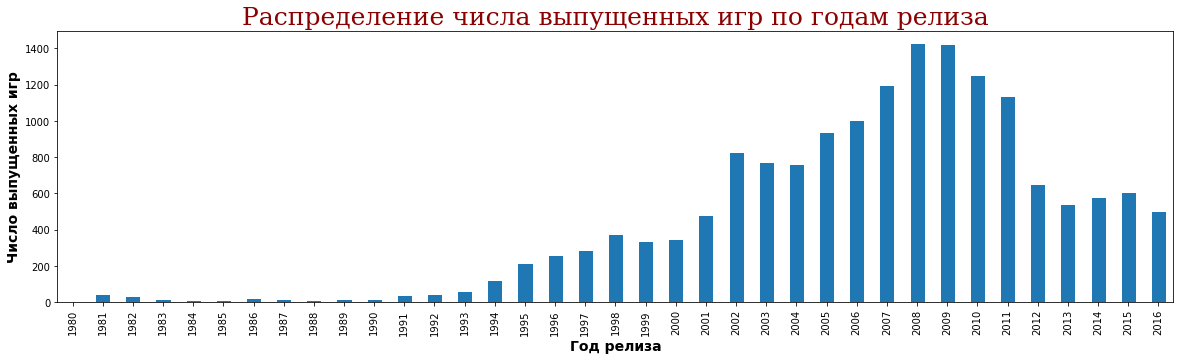

In [18]:
create_bar('year_of_release', 'count')
plt.title('Распределение числа выпущенных игр по годам релиза', fontdict=fontd)
plt.xlabel("Год релиза", fontsize=14, fontweight="bold")
plt.ylabel("Число выпущенных игр", fontsize=14, fontweight="bold")

<div class="alert alert-block alert-danger">
<b>Комментарии ревьюера V2: </b>

<s>Здорово, что ты автоматизировал процесс построения графика. Нужно только поработать над оформлением. Визуализация должна быть понятна без контекста. Тебе стоит добавить описание (заголовок, оси), чтобы было явно видно какие данные и какую зависимость показывает. Данная проблема встречается и далее, поэтому не буду акцентировать внимание на каждом случае, но тебе предстоит подкорректировать каждый подобный график. </s> Отлично !
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Согласен. Обновил оформление и добавил описание :заголовок, оси.   </div>

Видим, что максимум пришелся на 2008 и 2009 года.

Построим количество выпущенных игр по платформам.

Text(0, 0.5, 'Название платформы')

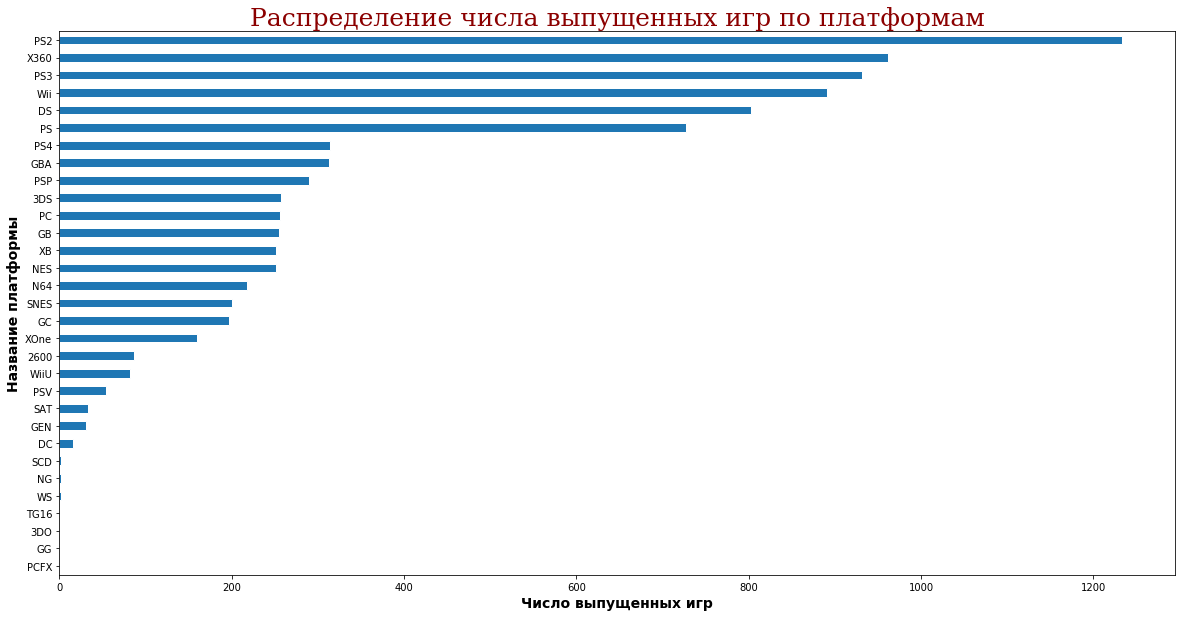

In [19]:
create_bar('platform', 'sum', 'sales_total')
plt.title('Распределение числа выпущенных игр по платформам', fontdict=fontd)
plt.xlabel("Число выпущенных игр", fontsize=14, fontweight="bold")
plt.ylabel("Название платформы", fontsize=14, fontweight="bold")

- 1-е место -  платформа PS2. 
Посмотрим, как менялись продажи по платформам.

In [20]:
!pip install mplcursors
import mplcursors

Defaulting to user installation because normal site-packages is not writeable


In [21]:
def create_lines(platforms=None, query=None):
    %matplotlib inline
     
    
    axis = plt.gca()
    legend_list = []
    if query == None:
        if platforms == None:
            bbox_y = 0.98
            legend_size = 9
            platforms = games.query('year_of_release != 2027')['platform'].unique().tolist()
        else:
            platforms = platforms
            bbox_y = 0.87
            legend_size = 11
    else:
        platforms = games.query('year_of_release != 2027').query(query)['platform'].unique().tolist()
        bbox_y = 0.87
        legend_size = 11
        
    for platform in platforms:
        if query == None:
            df_to_plot = games.query('year_of_release != 2027').query('platform == @platform')
        else:
            df_to_plot = games.query('year_of_release != 2027').query('platform == @platform').query(query)
        lines = df_to_plot.groupby('year_of_release')['sales_total'].sum().plot(x='year_of_release', y='sales_total',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=axis, figsize=(20,10))
        legend_list.append(platform)
    
    axis.set_xlabel('')
   
    axis.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))

    mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

Text(0, 0.5, 'Число выпущенных игр')

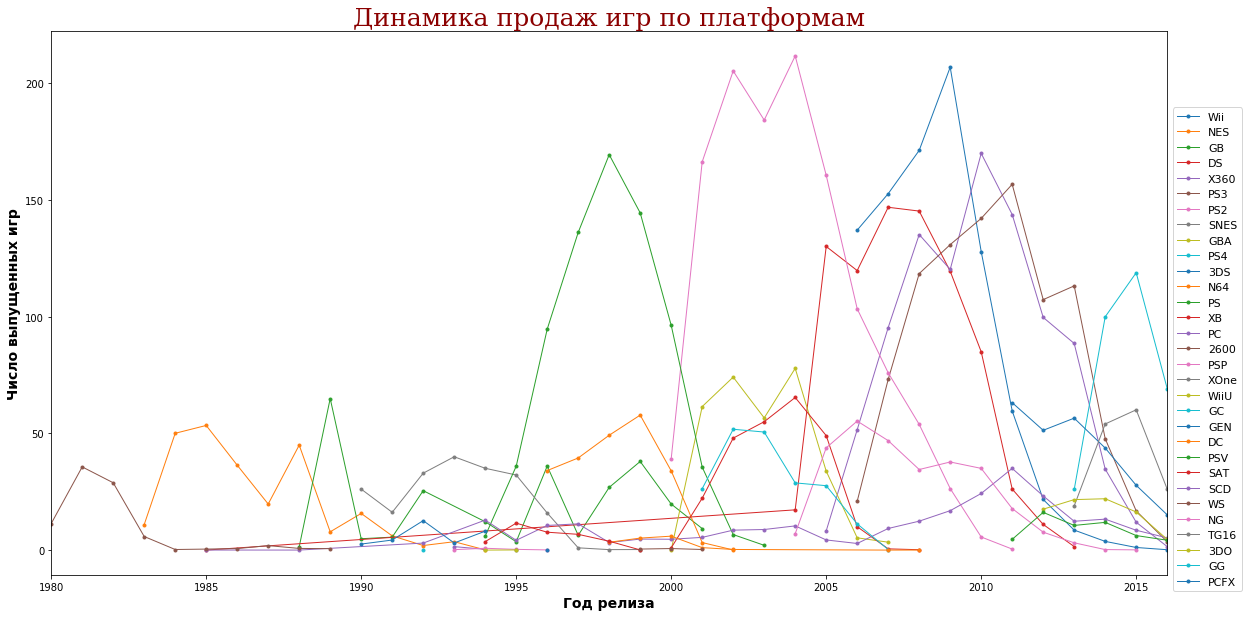

In [22]:
create_lines(query='year_of_release != 2027')
plt.title('Динамика продаж игр по платформам', fontdict=fontd)
plt.xlabel("Год релиза", fontsize=14, fontweight="bold")
plt.ylabel("Число выпущенных игр", fontsize=14, fontweight="bold")

In [23]:
games.groupby('platform')['sales_total'].sum().to_frame('sales_total')\
.sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
PS2,"1,255.77"
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Выберем топ-6 платформ построим для них аналогичный график

In [24]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Text(0, 0.5, 'Число выпущенных игр')

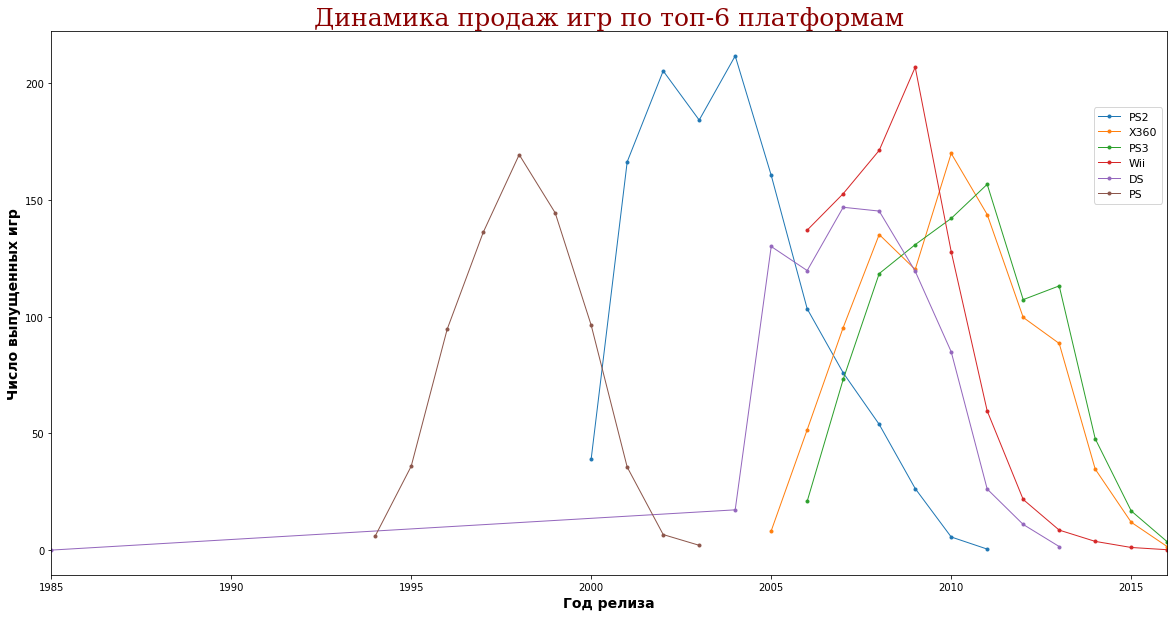

In [25]:
create_lines(platforms=top_platforms)
plt.title('Динамика продаж игр по топ-6 платформам', fontdict=fontd)
plt.xlabel("Год релиза", fontsize=14, fontweight="bold")
plt.ylabel("Число выпущенных игр", fontsize=14, fontweight="bold")

Средняя жизнь консоли - около 10 лет.
Заметим, что  у популярных в прошлом платформ PS, PS2, DS  сейчас продажи на нуле.
Выбираем актуальный, за который оценим данные, на основании выводов по которым будем строить предсказание на 2017 год.
Не берем 2016-й,чтобы исключить значимое искажение распределения по платформам в 2016 году.
Актуальный период выберем с 2013 по 2015 год, тут рынок выровнялся.
Построим  график для ответа на вопрос:
Какие платформы лидируют по продажам, растут или падают?
Выберем потенциально прибыльные платформы.

<div class="alert alert-block alert-danger">
<b>Комментарии ревьюера V2: </b>

 <s>Здесь стоит немного подкорректировать актуальный период. Ты выбрал довольно большой срок. Мы видим, что с 1980 по 1990 игр выпускалось совсем мало, а затем начался стремительный рост вплоть до 2008-2009 годов. Далее мы наблюдаем, что интерес к играм начал угасать. Незначительный скачок произошел в 2014 году. С 2005 по 2016 ситуация на рынке была довольно нестабильной. Нам важно сделать прогноз на 2017, поэтому нас интересуют только те платформы, которые живы на момент 2013 года, когда закончилось общее снижение рынка и ситуация стабилизировалась.  Выбери период, когда рынок уже выровнялся после общего падения, его можем назвать актуальным. Также стоит убрать из рассмотрения 2027 год (это не реальные данные, а заполнение пропусков маркером).
    
Обнови, пожалуйста, при необходимости, свои расчеты и выводы ниже.  </s>
    
Согласна с тобой! Можно оставить 2016 год. И рассматривать 2013- 2016. Обычно прогноз на будущий год делают в октябре-ноябре текущего года и мы всегда располагаем неполными данными за текущий год. Поэтому есть смысл их оставить, они самые свежие. 
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Период изменил</div>

Text(0, 0.5, 'Число выпущенных игр')

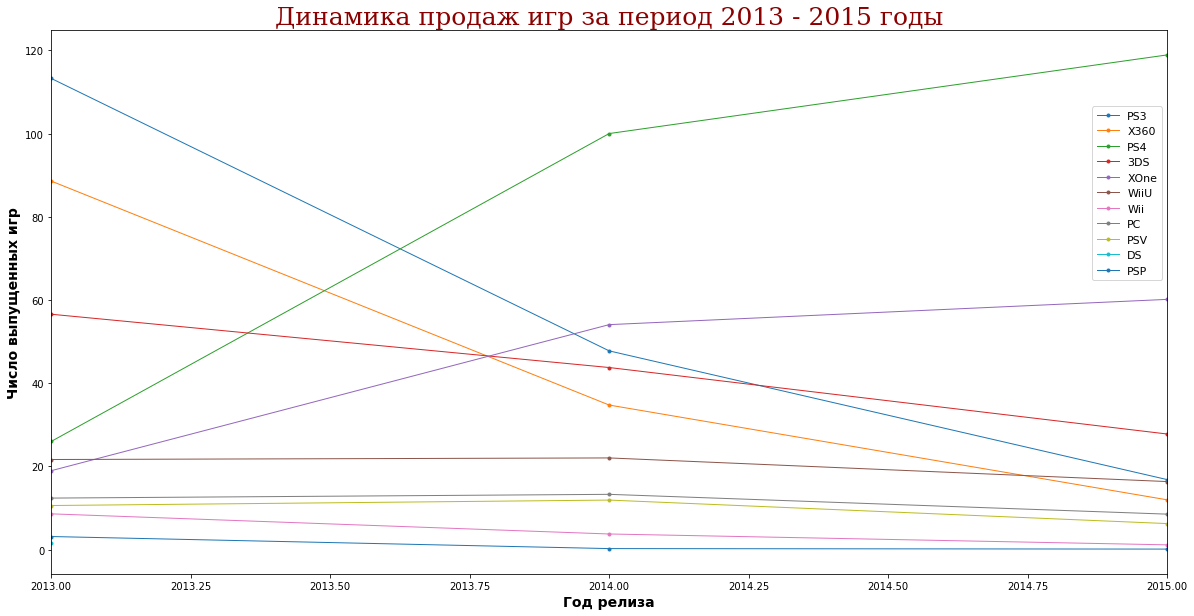

In [26]:
create_lines(query='year_of_release >= 2013  & year_of_release <= 2015')
plt.title('Динамика продаж игр за период 2013 - 2015 годы', fontdict=fontd)
plt.xlabel("Год релиза", fontsize=14, fontweight="bold")
plt.ylabel("Число выпущенных игр", fontsize=14, fontweight="bold")

In [27]:
games.query('year_of_release >= 2013  & year_of_release <= 2015').groupby('platform')['sales_total'].sum().to_frame('sales_total')\
.sort_values(by='sales_total', ascending=False).head(6)

,sales_total
platform,
PS4,244.89
PS3,177.83
X360,135.28
XOne,133.17
3DS,128.11
WiiU,60.03


Три победителя - PS4;PS3;X360.
Видим, что топ платформ отличаются от первоначального за все года.
С 2013 по 2015 год видим рост у PS4 и XOne, в то время как остальные компании падают либо не показывают рост. Данные за 2016 год могут быть неполными, для интереса посмотрим на все топ 6:  'PS4', 'PS3', 'X360', '3DS','XOne' , 'WiiU'.

Далее используем только выбранный период и платформы.

In [28]:
top_platforms = ['PS4', 'PS3', 'X360', '3DS','XOne' , 'WiiU']

In [29]:
games = games.query('year_of_release >= 2013  & year_of_release <= 2015')

Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

Напишем для этого функцию для отрисовки

In [30]:
def create_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = games.boxplot(column='sales_total', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = games.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='sales_total', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')


<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V3: </b>

Отличная автоматизация!
</div>

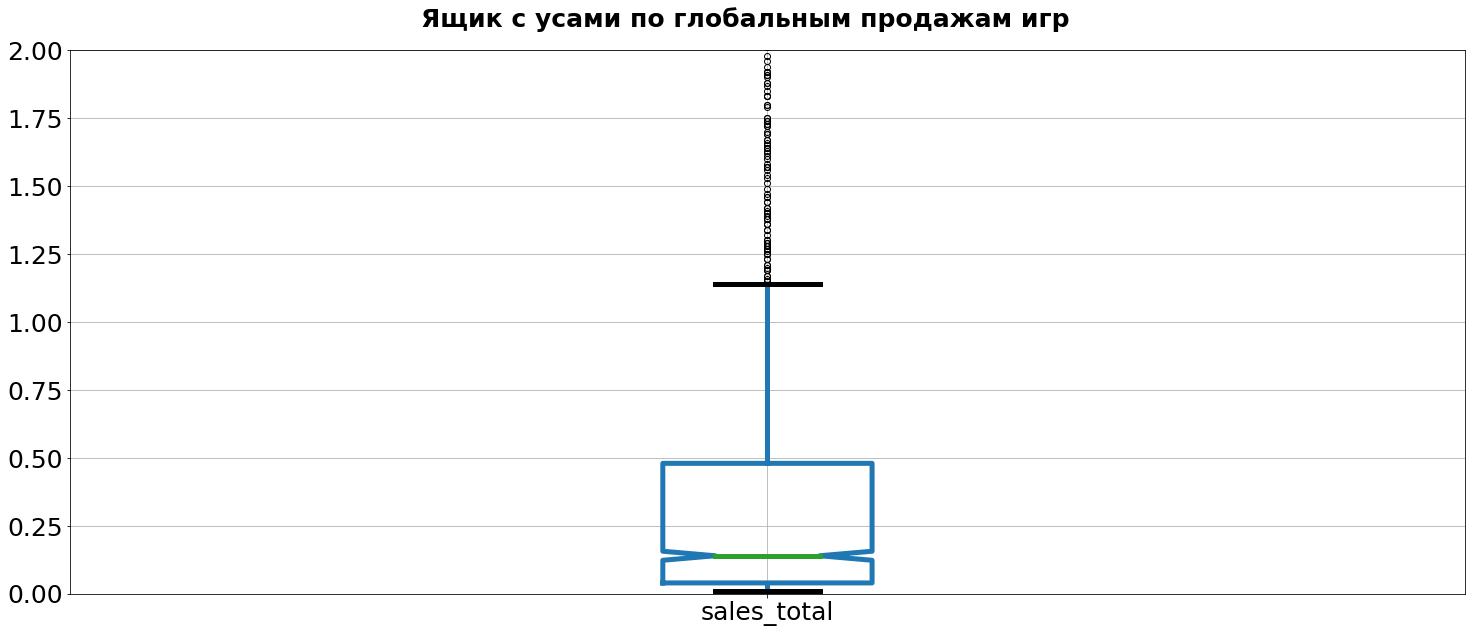

In [31]:
create_boxplot(title='Ящик с усами по глобальным продажам игр', ylims=[0,2])

Средние продажи игр составляют - чуть больше 1 млн долларов, а медиана - около 0,2 миллиона.

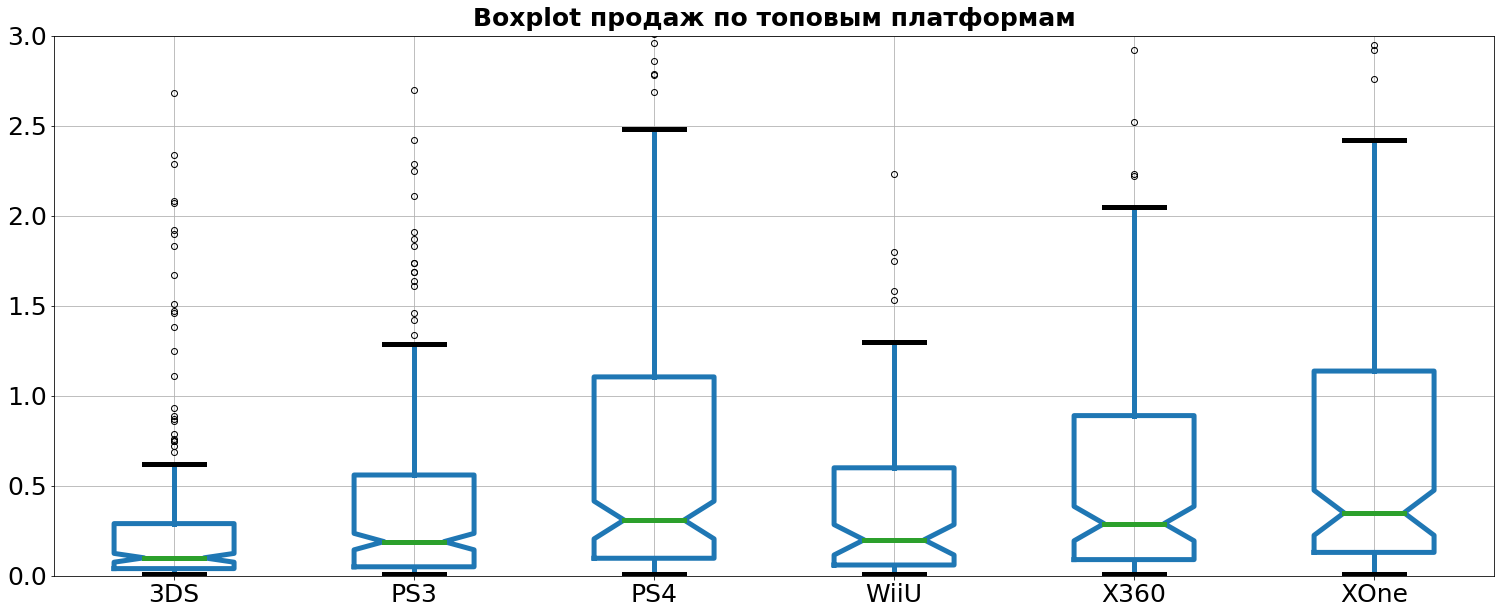

In [32]:
create_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms", ylims=[0,3])

<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V3: </b>

Топовые по продажам игры бывают на разных платформах, но всё же больше всего на PS4. 
</div>

Посмотрим, как влияют отзывы пользователей и критиков на продажи и построим диаграмму рассеяния.

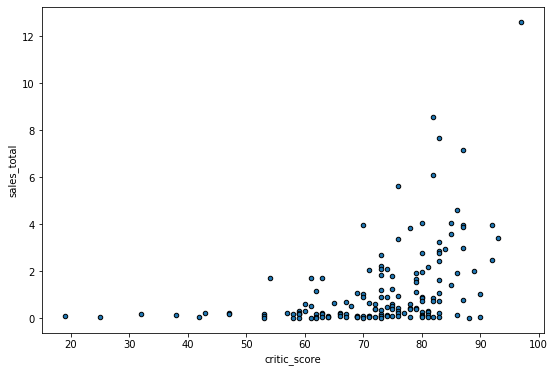

In [33]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

games_ps4 = games[(games['platform'] == 'PS4') & (games['critic_score'] > 0)].copy()
games_ps4.plot(kind='scatter', x='critic_score', y='sales_total', ec='black', figsize=(9,6))

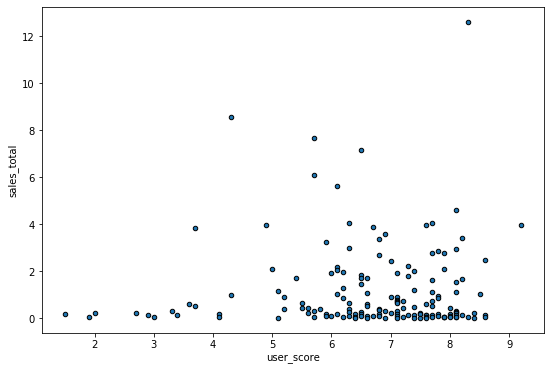

In [34]:
games_ps4 = games[(games['platform'] == 'PS4') & (games['user_score'] > 0)].copy()
games_ps4.plot(kind='scatter', x='user_score', y='sales_total', ec='black', figsize=(9,6))


При увеличении среднего рейтинга критиков средний уровень выручки с продажи игр увеличивается.
Далее от отзывов пользователей, видим в целом похожую картину.

Матрица корреляции:

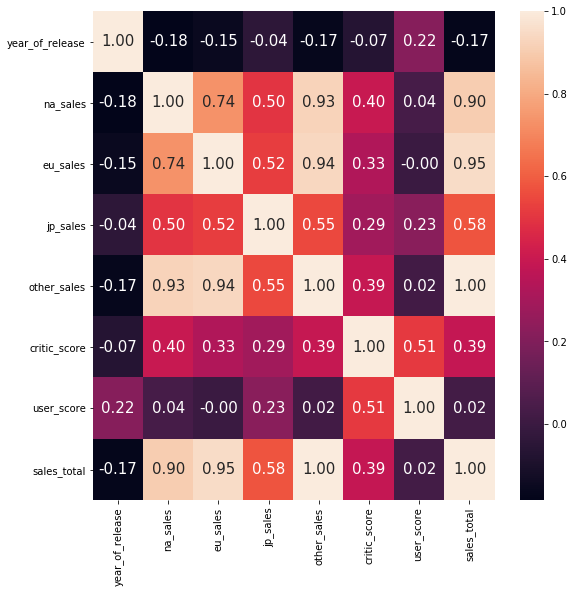

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(games_ps4.corr(), annot=True, fmt='.2f', annot_kws={'size':15})

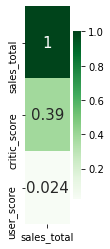

In [36]:
games_ps4_filtered = games_ps4[['sales_total' ,'critic_score', 'user_score']]
plt.figure(figsize=(1,4))
sns.heatmap(games_ps4_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15})

Данные по корреляции по топовым платформам:

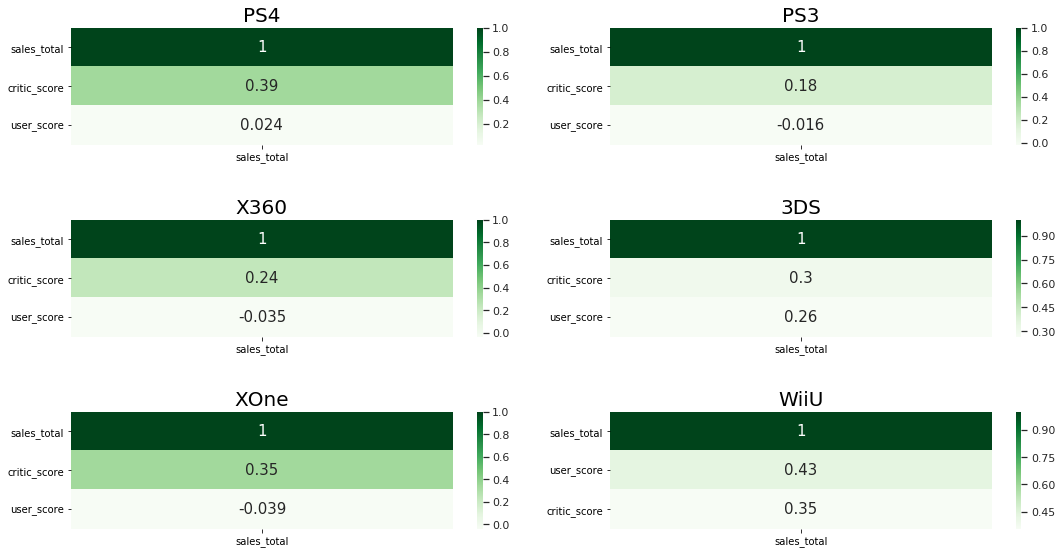

In [37]:
rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(16,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games[(games['platform'] == curr_platform) & (games['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Данные по корреляции между выручкой и оценкой критиков у PS4, 3DS, XOne, WiiU близки между собой, у PS3 и X360 - пониже.
Данные по корреляции между выручкой и оценкой пользователей близки к нулю у платформ PS4, PS3, X360, XOne и приблизительно на порядок выше у платформ 3DS, WiiU.


<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V3: </b>

Верно. Возможно у платформ 3DS, WiiU своя лояльная аудитория. Вообще здесь мы можем наблюдать какую-то корреляцию, но это пока ничего не говорит о какой-то зависимоти. Мы не знаем, когда были собраны эти данные - до продаж или после. 
</div>

Распределение игр по жанрам. Для этого нарисуем столбчатую диаграмму с количеством и общей суммой продаж и расскажем о самых прибыльных жанрах, а потом посмотрим на особенности жанров с высокими и низкими продажами.

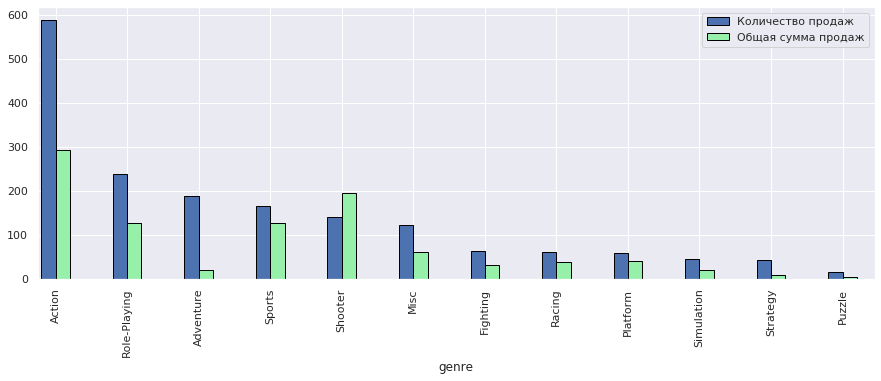

In [38]:
ax = plt.gca()

pivot = games.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['sales_total']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

Больше всего игр жанра Action, потом идут игры спортивного жанра.

Количество проданных копий:
Action
Спортивный жанр
Игры "смешанного" жанра - Miscellaneous
...аутсайдеры - игры, которые требуют усидчивости:

Сумма выручки:
Action
Спортивный жанр
Шутеры
...аутсайдеры почти те же герои:

<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V2: </b>

Видно, что Action игр выпускают много, но в среднем каждая игра продаётся средненько. А вот Shooter продаются относительно неплохо. Так же хорошие продажи на игру у жанра Sports, Fighting, Role-Playing. Антилидеры по продажам: Adventure и Strategy, Puzzle.
    
Здесь еще можно сделать сводную табличку genre_stat = games.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'mean', 'sum']). 
</div>

In [39]:
genre_stat = games.pivot_table(index='genre', values='sales_total', aggfunc=['count', 'mean', 'sum'])
genre_stat

,count,mean,sum
,sales_total,sales_total,sales_total
genre,,,
Action,588,0.50,291.76
Adventure,189,0.10,19.82
Fighting,64,0.48,30.84
Misc,123,0.49,60.22
Platform,59,0.67,39.40
Puzzle,16,0.20,3.16
Racing,61,0.61,37.10
Role-Playing,238,0.54,127.71


<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V3: </b>
Отлично. теперь все наглядно и в цифрах. 
</div>

# 4. Портрет пользователя регионов NA, EU, JP<a name="4."></a>
<font size="2">([к содержанию](#0.0))</font>
Задаем функцию прорисовки и определяем самые популярные платформы в заданных регионах:

In [40]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': None, 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

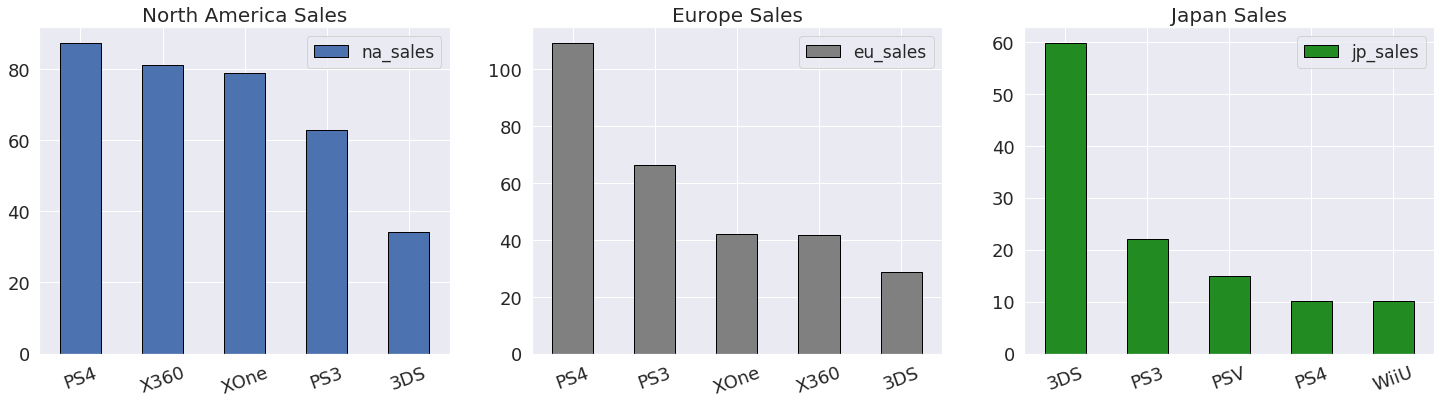

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

Определение самых популярных жанров в заданных регионах:

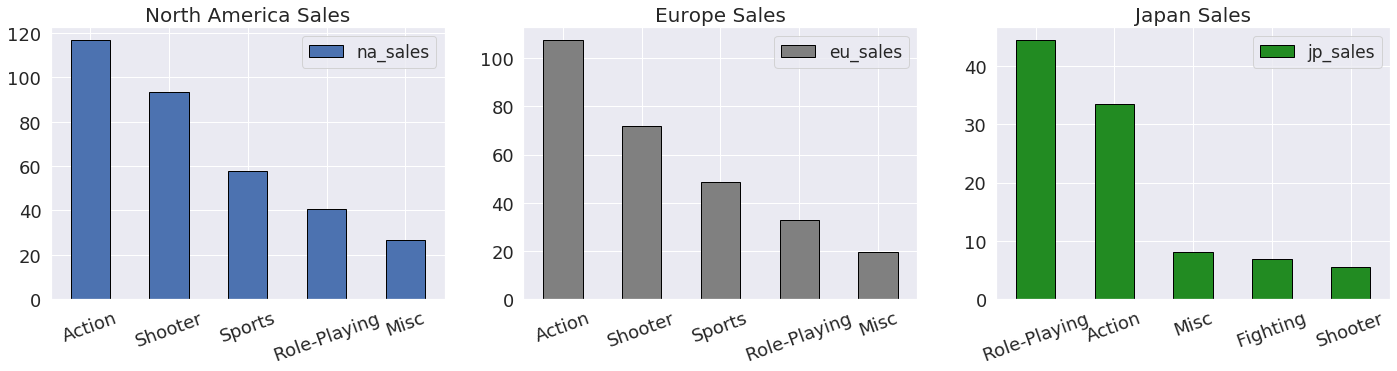

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(24,5))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

Влияние рейтинга ESRB на продажи в отдельном регионе.

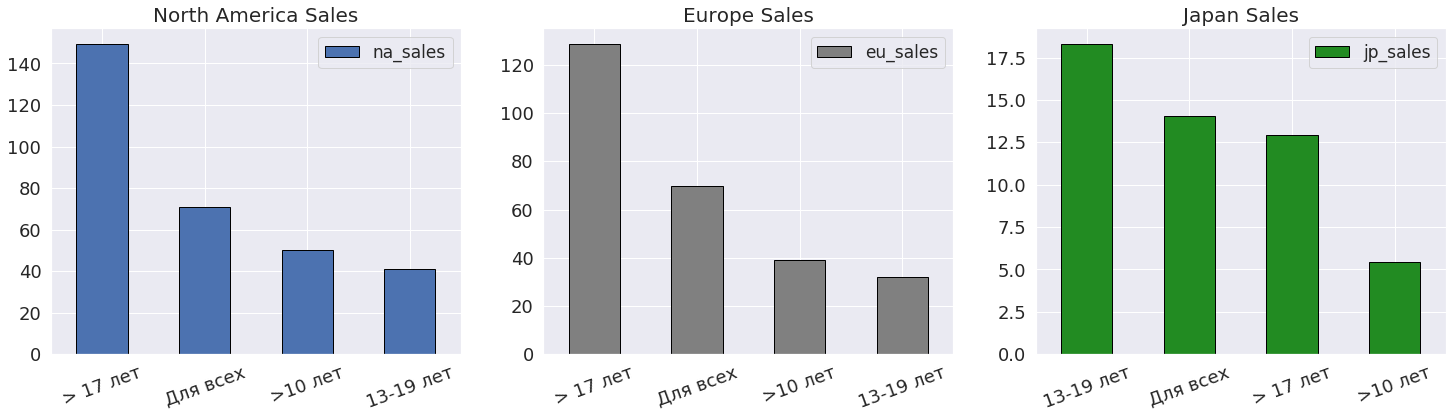

In [43]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех(устар.)'}
games['ESRB_description'] = games[games['rating'].notnull()]['rating'].map(ESRB_dict)
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

В Северной Америке и в Европе картина похожая. 
В Японии иначе. Первое место - игры для лиц от 13 до 19 лет, а  на втором - "Для всех" -  этому есть объяснение: мы помним, что в Японии мы заполнили много пропусков в рейтинге - out of rating. Скорее всего, это местные игры, которые не проходят сертификации по стандарту ESRB.

<div class="alert alert-block alert-danger">
<b>Комментарии ревьюера V2: </b>

<s>Здесь есть небольшая неточность. В Японии много игр с рейтингом out of rating (пропуски, которые мы заполнили). Возможно, это местные игры, которые не проходят сертификации по стандарту ESRB. Стоит это отметить в отчете.  </s>
</div>

# 5. Исследование статистических показателей<a name="5."></a>
<font size="2">([к содержанию](#0.0))</font>

Увидим, как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах.
Для этого создадим две сводные талицы по жанрам и рейтингам за выбранный период.

In [44]:
games = games.query('critic_score>-1 & user_score>-1')

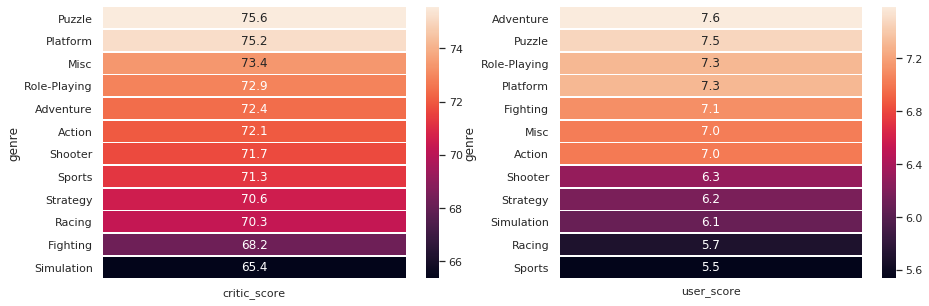

<Figure size 720x360 with 0 Axes>

In [45]:
critic_genre = games.pivot_table(index='genre', values='critic_score', aggfunc='mean').fillna(0).applymap(float).sort_values(by='critic_score', ascending=False)
user_genre = games.pivot_table(index='genre', values='user_score', aggfunc='mean').fillna(0).applymap(float).sort_values(by='user_score', ascending=False)
fig, ax = plt.subplots(1 ,2, figsize=(15,5))
plt.figure(figsize=(10,5))
sns.heatmap(critic_genre, annot=True, fmt='.1f', linewidths=.6, ax=ax[0])
sns.heatmap(user_genre, annot=True, fmt='.1f', linewidths=.6, ax=ax[1])

На основе средних оценок по жанрам можно заключить:
Наивысшие оценки критиков получают: Puzzle, Platform, Misc.
Наивысшие оценки пользователей получают: Adventure, Puzzle, Role-Playing.
Оценка жанра Puzzle близка у пользователей и критиков, но в целом вкусы критиков и пользователей немного отличаются.

Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам пользователей.

In [46]:
game_genres = games['genre'].unique()
game_genres = game_genres[:-1]
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(games[games['genre']==genre]['user_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(games[games['genre']==genre]['user_score']))
    print('Среднее',genre.upper(),':',  games[games['genre']==genre]['user_score'].mean())
    print('Медиана',genre.upper(),':',  games[games['genre']==genre]['user_score'].median())
    print('\n')

Дисперсия ACTION : 1.4532289930555558
Стандартное отклонение ACTION : 1.2054994786624986
Среднее ACTION : 7.012083333333334
Медиана ACTION : 7.4


Дисперсия SHOOTER : 2.063537326388889
Стандартное отклонение SHOOTER : 1.436501766928565
Среднее SHOOTER : 6.297916666666667
Медиана SHOOTER : 6.45


Дисперсия SPORTS : 2.165153061224489
Стандартное отклонение SPORTS : 1.4714459083583362
Среднее SPORTS : 5.535714285714286
Медиана SPORTS : 5.75


Дисперсия ROLE-PLAYING : 1.6298371306514774
Стандартное отклонение ROLE-PLAYING : 1.2766507473273485
Среднее ROLE-PLAYING : 7.316037735849057
Медиана ROLE-PLAYING : 7.55


Дисперсия RACING : 2.4690909090909092
Стандартное отклонение RACING : 1.5713341175863615
Среднее RACING : 5.7
Медиана RACING : 5.9


Дисперсия PLATFORM : 2.24509375
Стандартное отклонение PLATFORM : 1.4983636908307676
Среднее PLATFORM : 7.3125
Медиана PLATFORM : 7.9


Дисперсия SIMULATION : 3.468096885813149
Стандартное отклонение SIMULATION : 1.8622827083483187
Среднее SIMULATION 

Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам критиков.

In [47]:
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(games[games['genre']==genre]['critic_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(games[games['genre']==genre]['critic_score']))
    print('Среднее',genre.upper(),':',  games[games['genre']==genre]['critic_score'].mean())
    print('Медиана',genre.upper(),':',  games[games['genre']==genre]['critic_score'].median())
    print('\n')

Дисперсия ACTION : 141.20956597222224
Стандартное отклонение ACTION : 11.883163129917145
Среднее ACTION : 72.05416666666666
Медиана ACTION : 73.0


Дисперсия SHOOTER : 164.1396484375
Стандартное отклонение SHOOTER : 12.81169967012574
Среднее SHOOTER : 71.71875
Медиана SHOOTER : 75.0


Дисперсия SPORTS : 259.48979591836735
Стандартное отклонение SPORTS : 16.108686970649327
Среднее SPORTS : 71.28571428571429
Медиана SPORTS : 76.5


Дисперсия ROLE-PLAYING : 141.6437344250623
Стандартное отклонение ROLE-PLAYING : 11.90141732841355
Среднее ROLE-PLAYING : 72.91509433962264
Медиана ROLE-PLAYING : 73.0


Дисперсия RACING : 224.889979338843
Стандартное отклонение RACING : 14.996332196201944
Среднее RACING : 70.29545454545455
Медиана RACING : 75.0


Дисперсия PLATFORM : 214.29437500000003
Стандартное отклонение PLATFORM : 14.63879691094866
Среднее PLATFORM : 75.175
Медиана PLATFORM : 79.5


Дисперсия SIMULATION : 250.1107266435986
Стандартное отклонение SIMULATION : 15.814889397134543
Среднее SI

Построим на распределения оценок пользователей и критиков по жанрам игр. Для этого напишем функцию для отрисовки гистограм.

In [48]:
def genre_hist(genre):
    fig, axes = plt.subplots(figsize = (15,10))
    data = games[games['genre'] == genre]
    user_score = data['user_score'] * 10
    critic_score = data['critic_score']
    colors = ['black', 'r']

    plt.hist([user_score, critic_score], color = colors, alpha=.9, label = ['user_score', 'critic_score'])
    plt.legend()
    plt.title(genre)

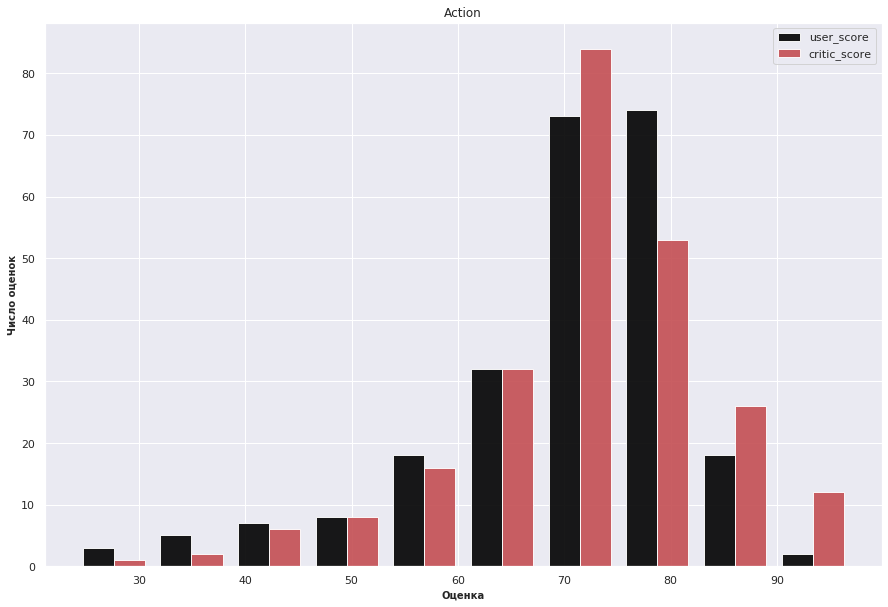

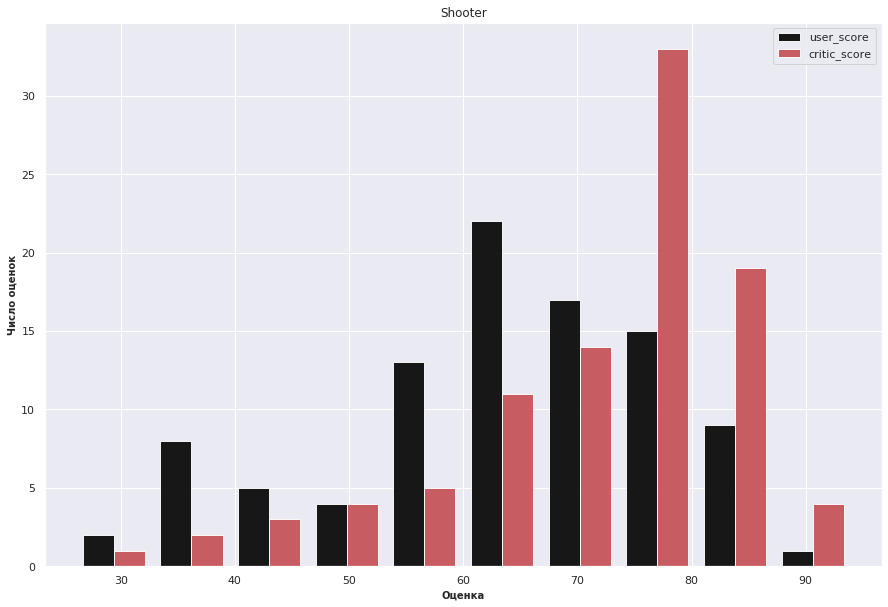

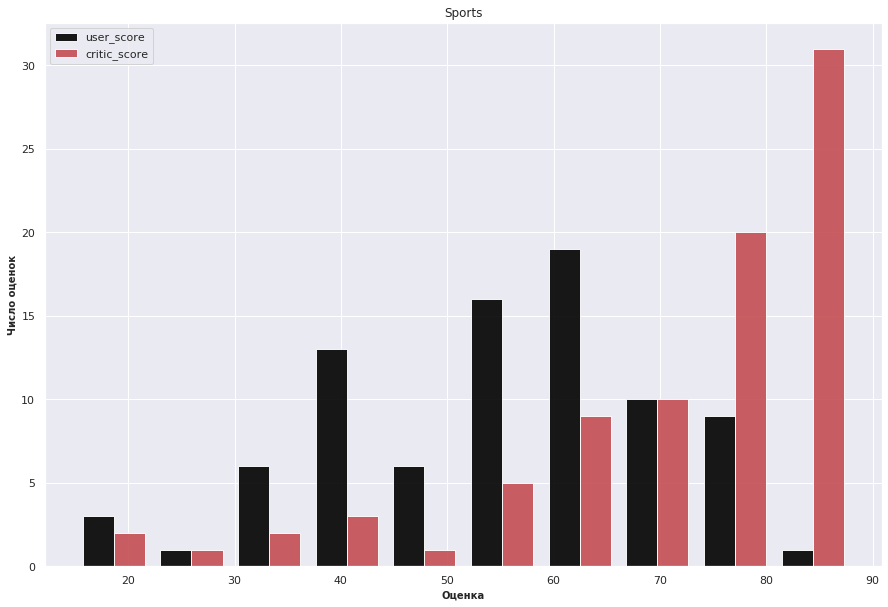

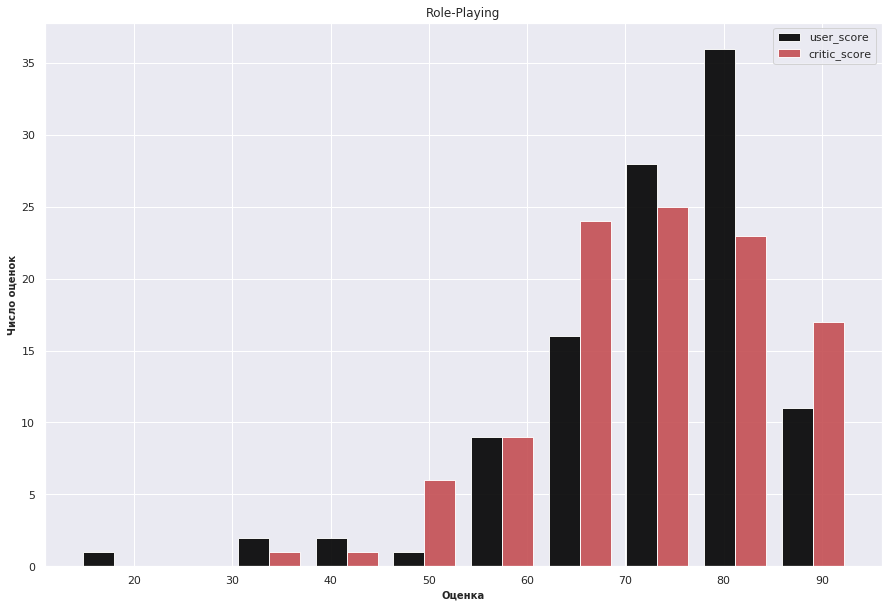

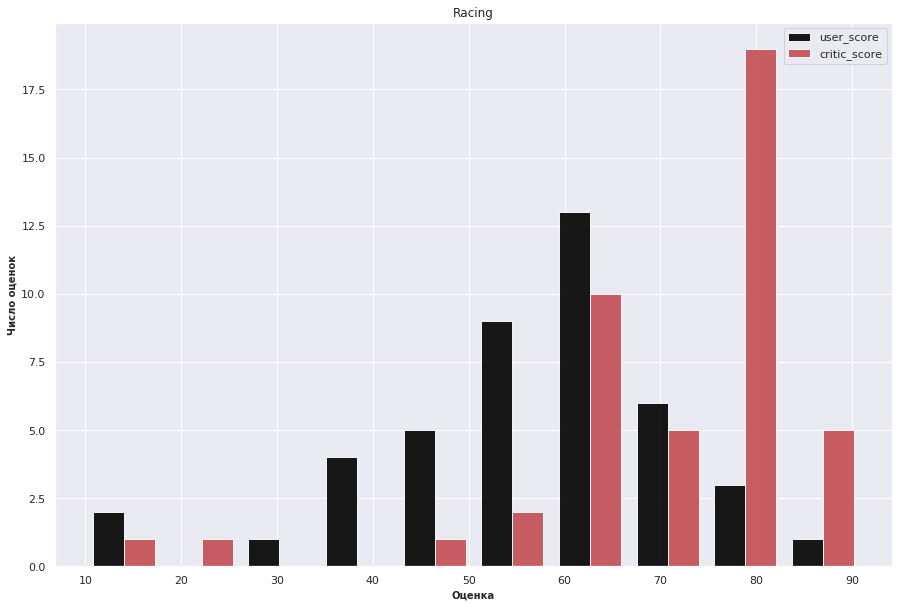

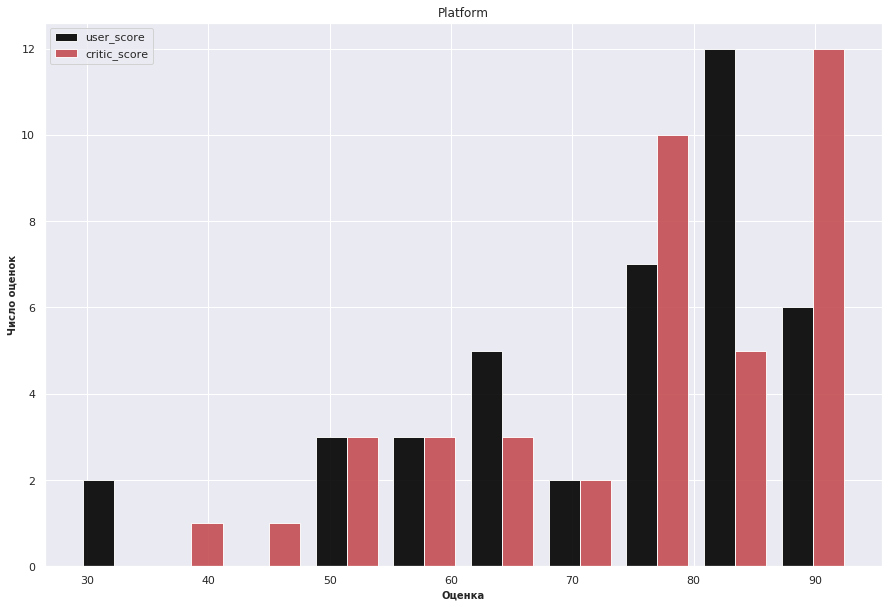

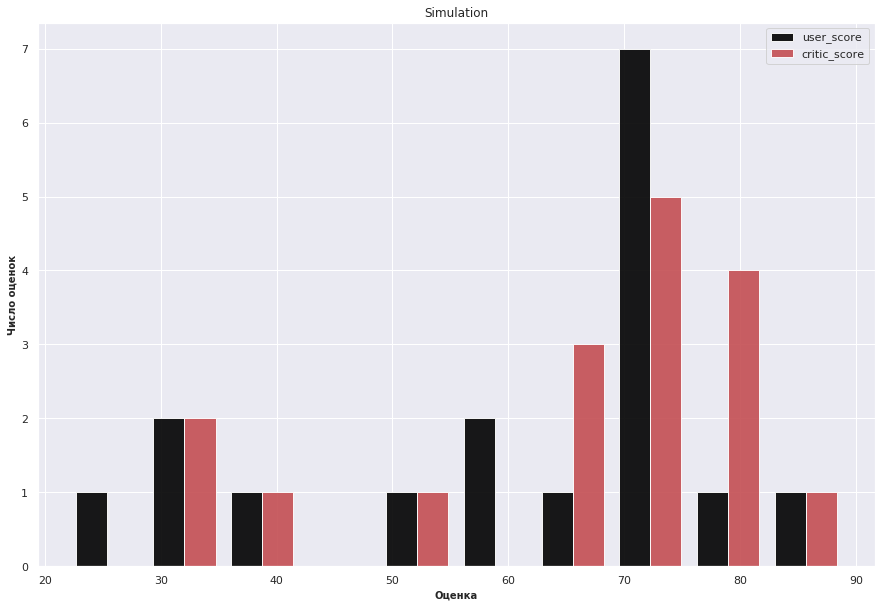

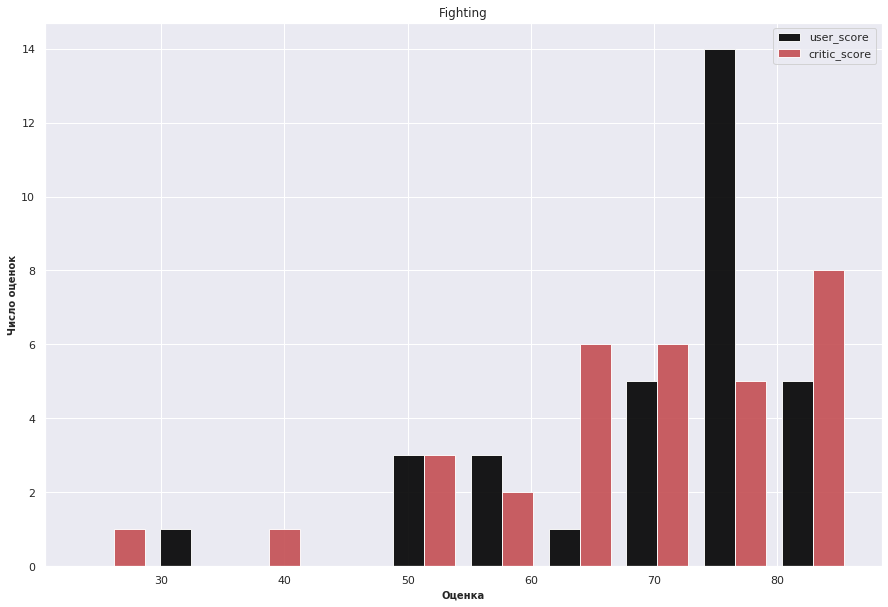

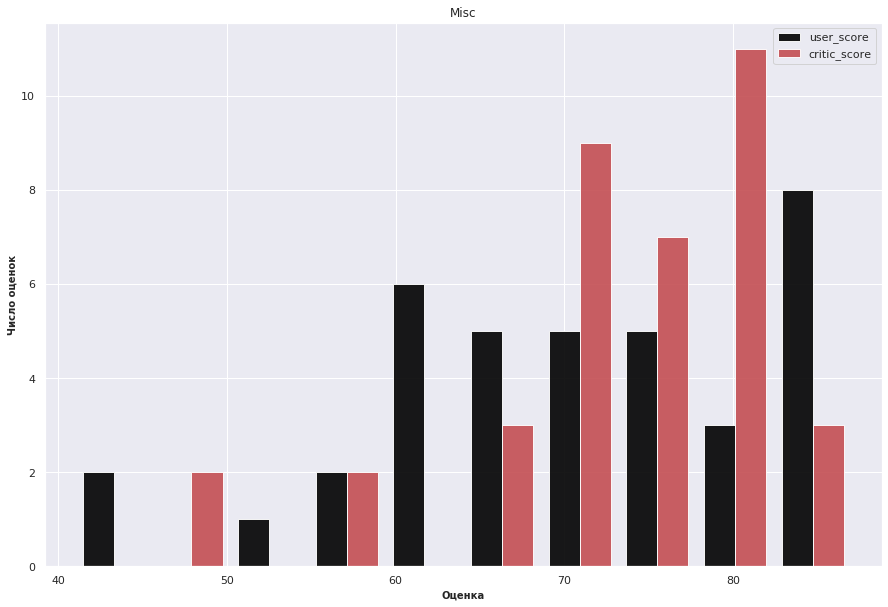

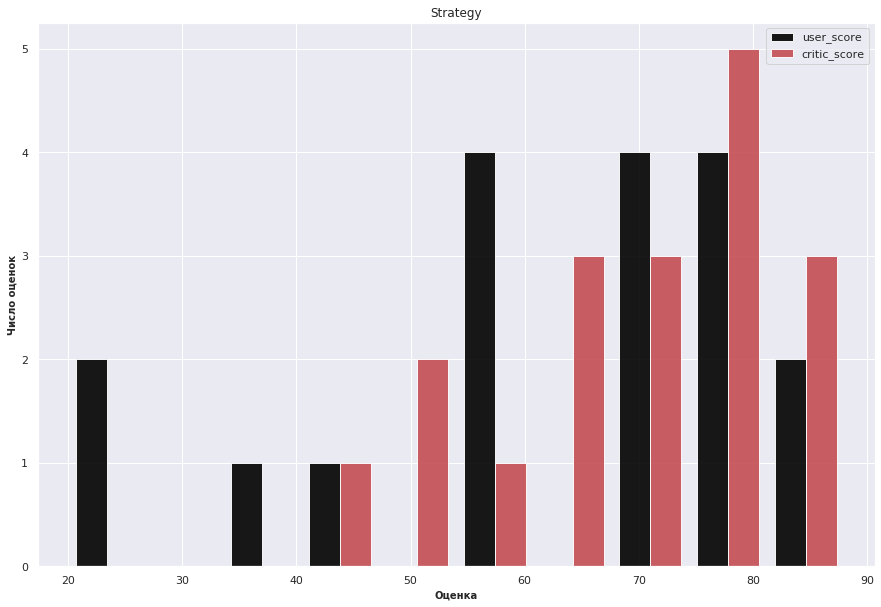

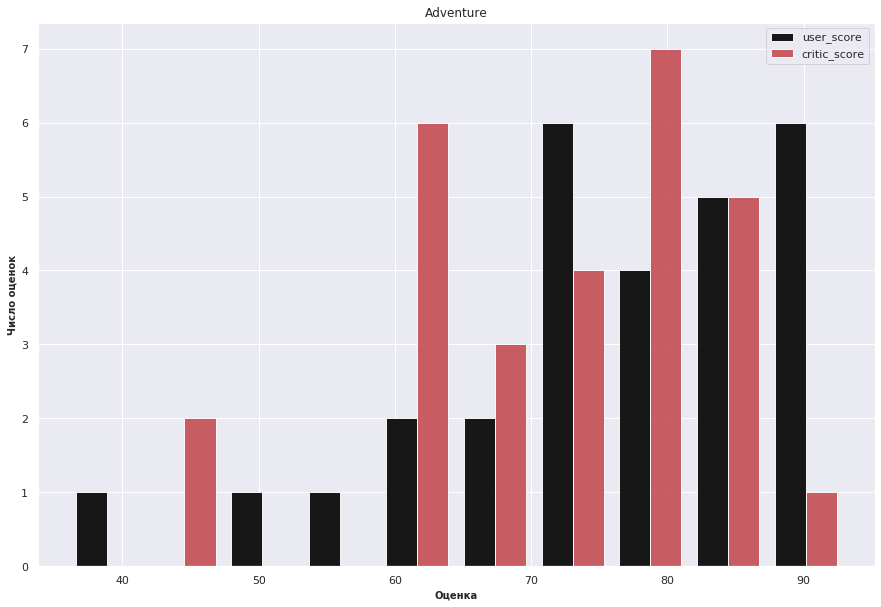

In [49]:
for genre in game_genres:
    genre_hist(genre)
    plt.xlabel("Оценка", fontsize=10, fontweight="bold")
    plt.ylabel("Число оценок", fontsize=10, fontweight="bold")

Далее построим общие распределения оценок пользователей и критиков, еще нам нужно домножить оценки пользователей на 10, чтобы мы смогли сравнить распределения.

Text(0, 0.5, 'Число оценок')

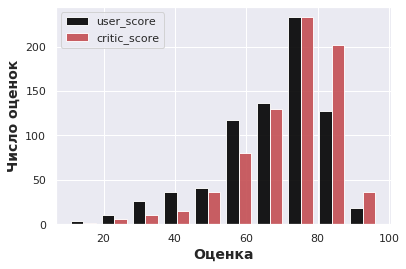

In [50]:
user_score = games['user_score'] * 10
critic_score = games['critic_score']
colors = ['black', 'r']

plt.hist([user_score, critic_score], color = colors, alpha=.9, label = ['user_score', 'critic_score'])
plt.legend()
plt.xlabel("Оценка", fontsize=14, fontweight="bold")
plt.ylabel("Число оценок", fontsize=14, fontweight="bold")

Распределения оценок пользователей и критиков практически симметричны и оба смещены влево. Это означает, что в нашем датасете куда меньше игр с высокими оценками критиков и пользователей.

 # 6. Проверка гипотез<a name="6."></a>
<font size="2">([к содержанию](#0.0))</font>
 
 Гипотеза № 1:
средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Для проверки обеих гипотез будем использовать <b>t-критерий Стьюдента</b>, т.к. в обоих случаях выборки независимы между собой.<br/>
Определим пороговое значение alpha = 0.05

<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V2: </b>

Гипотезы сформулированы верно. 
</div>

In [51]:
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings)

print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 0.8046866950206211
p-value = 4.2191930722e-01

Пороговое значение alpha = 0.05


Мы не можем отклонить нулевую гипотезу.
Поэтому разумно предположить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V3: </b>

Теперь все верно. Здесь нам также нужно задать параметр equal_var=False. 
</div>

In [52]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xbox_one_ratings.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc_ratings.mean()))


Средняя оценка пользователей игр для платформы Xbox One  - 6.47
Средняя оценка пользователей игр для платформы PC - 6.30


Гипотеза № 2:
средние пользовательские рейтинги жанров Action и Sports разные.
Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой. Используем equal_var = False, т.к. дисперсии генеральных совокупностей двух выборок могут быть неравными.

<div class="alert alert-block alert-success">
<b>Комментарии ревьюера V2: </b>

Гипотезы сформулированы верно. 
</div>

In [53]:
action_ratings = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(action_ratings, pc_ratings, equal_var=False)

print('t = {}\np-value = {}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 8.231748612562061
p-value = 2.1754702345663687e-13

Пороговое значение alpha = 0.05


Отвергаем нулевую гипотезу.
Остается верным утверждение, что средние пользовательские рейтинги у жанров Action и Sports отличаются между собой.

<div class="alert alert-block alert-danger">
<b>Комментарии ревьюера V2: </b>
<s>Здесь стоит использовать параметр equal_var. Также когда скорректируешь выбор актуального периолда должно получиться так, что в первом случае мы не можем отвергнуть нулевую гипотезу, а во втором отвергаем. </s>
    
Теперь все корректно.     
</div>

# 7. Общий вывод<a name="7."></a>
<font size="2">([к содержанию](#0.0))</font>

Самое большое влияние на конечную выручку оказывают оценки критиков.
Средний бюджет на разработку одной игры в последние годы вырос. 

Крупные компании игровой индустрии в погоне за технологиями, малые компании - ищут свои альтернативные пути.
Рынок последние годы падает и  будет продолжать падать дальше.

<div class="alert alert-block alert-success">
<b>Комментарии ревьюера: </b>

<s>Итог ревью - ты проделал большую работу и по большей части - успешно!  В целом, мне понравилась структура исследования, твои выводы после каждого этапа, комментарии к своим действиям. Было легко и интересно проверять. Ты непросто грамотно применяешь все методы, но и обосновываешь каждое своё действие.
    
Для принятия проекта осталось поправить пару моментов:
    
    
- оформить все визуализации (добавить название и подписи осей)
- скорректировать выбор актуального периода и обновить все расчеты
- исправить неточность в портрете пользователя (Япония, рейтинг)
- поправить проверку гипотез.
    
    
Я уверена, это не займет много времени. Буду ждать исправленный вариант!    </s>
    
Ты устранил почти все замечания. Осталась небольшая помарка - не везде есть подписи графиков, но не вижу причин отправлять на повторное ревью. Хочется отметить, что ты серьезно подошел к проекту и провел глубокий анализ. Молодец :) Проект принят. 
</div>
    